[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Stewart_1975/fig_1.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Stewart_1975/fig_1.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Stewart_1975/fig_1.ipynb)

### based on Fig. 1 from Stewart 1975 (J. Geophys. Res.) "_Stable Isotope FractionationDue to Evaporation and Isotopic Exchange of Falling Waterdrops: Applications to Atmospheric Processes and Evaporation of Lakes_" (https://doi.org/10.1029/JC080i009p01133)

In [10]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from PySDM import Formulae
from PySDM.physics import si, in_unit
from open_atmos_jupyter_utils import show_plot

from PySDM_examples.Kinzer_And_Gunn_1951.table_1_and_2 import table1

In [12]:
formulae = Formulae(
    ventilation='PruppacherAndRasmussen1979',
    diffusion_thermics='Neglect',
    air_dynamic_viscosity='ZografosEtAl1987',
    terminal_velocity='RogersYau',
    particle_shape_and_density='LiquidSpheres'
)
const = formulae.constants


In [13]:
radii = np.asarray(table1['Diameter [cm]'])[:-2] / 2 * si.cm 

temperature = 293.15 * si.K
eta_air\
    = formulae.air_dynamic_viscosity.eta_air(temperature)
air_density = const.p_STP/const.Rd/temperature
Sc = formulae.trivia.air_schmidt_number(
    dynamic_viscosity=eta_air, 
    diffusivity=formulae.diffusion_thermics.D(
        T=temperature, 
        p=const.p_STP
    ), 
    density=air_density,
)
Re = formulae.particle_shape_and_density.reynolds_number(
     radius=radii,
     velocity_wrt_air=formulae.terminal_velocity.v_term(radii),
     dynamic_viscosity=eta_air,
     density=air_density,
)
sqrt_re_times_cbrt_sc = formulae.trivia.sqrt_re_times_cbrt_sc(Re=Re,Sc=Sc)

In [14]:
def F_of_f(ventilation_coefficient):
    return (
            (ventilation_coefficient - 1) 
            / np.sqrt(Sc * Re / 4 / np.pi)
    )

In [15]:
ventilation_coefficient_kinzer_gunn\
    = (np.array(table1[f"{int(formulae.trivia.K2C(temperature))} [deg C]"][:-2]) 
       / 4 / np.pi / in_unit(radii,si.cm))
ventilation_factor_kinzer_gunn = F_of_f(ventilation_coefficient_kinzer_gunn)

ventilation_coefficient_beard_pruppacher = formulae.ventilation.ventilation_coefficient(sqrt_re_times_cbrt_sc)
ventilation_factor_beard_pruppacher = F_of_f(ventilation_coefficient_beard_pruppacher)


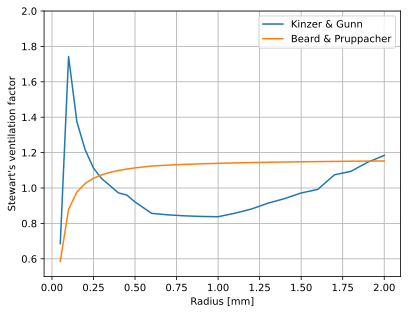

In [16]:
plot_factor={}
plot_factor["Kinzer & Gunn"] = plt.plot(
    in_unit(radii, si.mm),
    ventilation_factor_kinzer_gunn,
    label='Kinzer & Gunn'
)
plot_factor["Beard & Pruppacher"] = plt.plot(
    in_unit(radii, si.mm),
    ventilation_factor_beard_pruppacher,
    label='Beard & Pruppacher'
)
plt.xlabel("Radius [mm]")
plt.ylabel("Stewart's ventilation factor")
plt.ylim(0.5,2)
plt.grid()
plt.legend()
show_plot("fig_1")

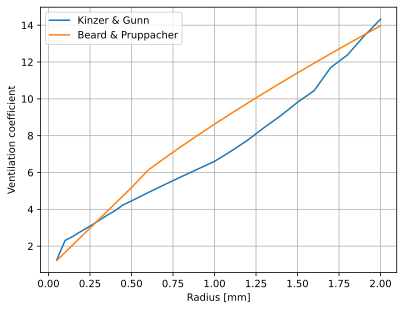

In [17]:
plot_K_G_coeff = plt.plot(
    in_unit(radii, si.mm),
    ventilation_coefficient_kinzer_gunn,
    label='Kinzer & Gunn'
)
plot_B_P_coeff = plt.plot(
    in_unit(radii, si.mm),
    ventilation_coefficient_beard_pruppacher,
    label='Beard & Pruppacher'
)
plt.xlabel("Radius [mm]")
plt.ylabel("Ventilation coefficient")
plt.grid()
plt.legend()
show_plot("ventilation_coeff.pdf")